# Structure of the singularities produced by colliding plane waves by Yurtsever
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  December 27, 2021

Here we work with the metric given by equation 2.5.  From under equation 2.7 "Therefore, it is sufficient to solve Eqs. (2.6c) and (2.6d) first and to obtain M by quadrature from the first two equations (2.6a) and (2.6b) afterward, since Eq. (2.7) as well as the integrability condition for (2.6a) and (2.6b) are automatically satisfied as a result of (2.6c) and (2.6d).  The initial value problem associated with the field equations is best formulated in terms of initial data posed on null characteristic surfaces"

https://journals.aps.org/prd/abstract/10.1103/PhysRevD.38.1706

https://thesis.library.caltech.edu/8009/

Kasner solution is equation 3.21  Kasner's newphew is where the name Googol comes from!

http://www.nasonline.org/publications/biographical-memoirs/memoir-pdfs/kasner-edward.pdf

In [69]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [70]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [71]:
u,v,x,y,du,dv,dx,dy = symbols( 'u v x y du dv dx dy' ) 

In [72]:
M = Function('M')(u,v)
M

In [73]:
U = Function('U')(u,v)
U

In [74]:
V = Function('V')(u,v)
V

In [75]:
variables = Matrix( [u,v,x,y] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [76]:
differentials = Matrix( [du,dv,dx,dy] ) 
differentials

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [77]:
lineElement = expand(2*exp(-M)*du*dv - exp(-U)*( exp(V)*dx**2 + exp(-V)*dy**2 ))
lineElement

In [78]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡            -M(u, v)                                           ⎤
⎢    0      ℯ                   0                    0          ⎥
⎢                                                               ⎥
⎢ -M(u, v)                                                      ⎥
⎢ℯ              0               0                    0          ⎥
⎢                                                               ⎥
⎢                        -U(u, v)  V(u, v)                      ⎥
⎢    0          0      -ℯ        ⋅ℯ                  0          ⎥
⎢                                                               ⎥
⎢                                             -U(u, v)  -V(u, v)⎥
⎣    0          0               0           -ℯ        ⋅ℯ        ⎦

In [79]:
import sympy

In [80]:
m = sympy.Array(g)
m

⎡            -M(u, v)                                           ⎤
⎢    0      ℯ                   0                    0          ⎥
⎢                                                               ⎥
⎢ -M(u, v)                                                      ⎥
⎢ℯ              0               0                    0          ⎥
⎢                                                               ⎥
⎢                        -U(u, v)  V(u, v)                      ⎥
⎢    0          0      -ℯ        ⋅ℯ                  0          ⎥
⎢                                                               ⎥
⎢                                             -U(u, v)  -V(u, v)⎥
⎣    0          0               0           -ℯ        ⋅ℯ        ⎦

In [81]:
from einsteinpy.symbolic import *

In [82]:
syms = sympy.symbols("u v x y")
u,v,x,y = syms

In [83]:
metric = MetricTensor(m,syms)

In [84]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                           
⎢⎡ ∂                                                                                        
⎢⎢-──(M(u, v))  0                                       0                                   
⎢⎢ ∂u                                                                                       
⎢⎢                                                                                          
⎢⎢     0        0                                       0                                   
⎢⎢                                                                                          
⎢⎢                 ⎛   -U(u, v)  V(u, v) ∂              -U(u, v)  V(u, v) ∂          ⎞  M(u,
⎢⎢                 ⎜- ℯ        ⋅ℯ       ⋅──(U(u, v)) + ℯ        ⋅ℯ       ⋅──(V(u, v))⎟⋅ℯ    
⎢⎢                 ⎝                     ∂v                               ∂v         ⎠      
⎢⎢     0        0  ───────────────────────────────────────────────────

In [85]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                             2                               2             
⎢                                ⎛∂          ⎞                   ⎛∂          ⎞            ∂ 
⎢                                ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟            ──
⎢      ∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠            ∂u
⎢      ──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────         - ──
⎢      ∂u          ∂u                  2            2                  2                    
⎢                                                 ∂u                                        
⎢                                                                                           
⎢                                                                                           
⎢  ∂           ∂             ∂           ∂                                                  
⎢  ──(U(u, v))⋅──(U(u, v))   ──(V(u, v))⋅──(V(u, v))      2           

In [86]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                       2                               2                   
⎢                          ⎛∂          ⎞                   ⎛∂          ⎞                    
⎢                          ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟                    
⎢∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠                    
⎢──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────                1.0
⎢∂u          ∂u                  2            2                  2                          
⎢                                           ∂u                                              
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                               2                     

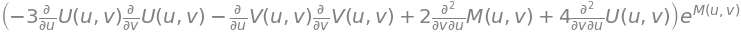

In [87]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [88]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [89]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

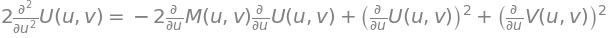

In [90]:
equation2pt6a = Eq(2*diff(U,u,u),2*solve( simplify(Ric.tensor()[0,0]), diff(U,u,u) )[0])
equation2pt6a

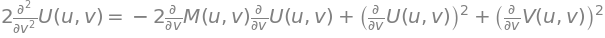

In [91]:
equation2pt6b = Eq(2*diff(U,v,v),2*solve( simplify(Ric.tensor()[1,1]), diff(U,v,v) )[0])
equation2pt6b

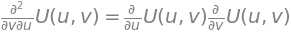

In [92]:
equation2pt6c = Eq( diff(U,u,v),solve( einst.tensor()[1,0], diff(U,u,v) )[0])
equation2pt6c

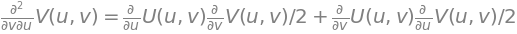

In [93]:
equation2pt6d = Eq(diff(V,u,v),solve( simplify(Ric.tensor()[2,2]).args[0] , diff(V,u,v) )[0] ).subs(equation2pt6c.args[0],equation2pt6c.args[1])
equation2pt6d

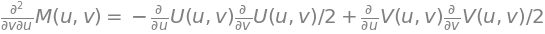

In [94]:
equation2pt7 = Eq(diff(M,u,v),solve( einst.tensor()[2,2].args[1].args[1].subs(equation2pt6c.args[0],equation2pt6c.args[1]) , diff(M,u,v) )[0])
equation2pt7

In [96]:
vacuumFieldEquations = Matrix([equation2pt6a,equation2pt6b,equation2pt6c,equation2pt6d,equation2pt7])
vacuumFieldEquations

⎡    2                                                       2                2⎤
⎢   ∂                 ∂           ∂             ⎛∂          ⎞    ⎛∂          ⎞ ⎥
⎢2⋅───(U(u, v)) = - 2⋅──(M(u, v))⋅──(U(u, v)) + ⎜──(U(u, v))⎟  + ⎜──(V(u, v))⎟ ⎥
⎢    2                ∂u          ∂u            ⎝∂u         ⎠    ⎝∂u         ⎠ ⎥
⎢  ∂u                                                                          ⎥
⎢                                                                              ⎥
⎢    2                                                       2                2⎥
⎢   ∂                 ∂           ∂             ⎛∂          ⎞    ⎛∂          ⎞ ⎥
⎢2⋅───(U(u, v)) = - 2⋅──(M(u, v))⋅──(U(u, v)) + ⎜──(U(u, v))⎟  + ⎜──(V(u, v))⎟ ⎥
⎢    2                ∂v          ∂v            ⎝∂v         ⎠    ⎝∂v         ⎠ ⎥
⎢  ∂v                                                                          ⎥
⎢                                                                              ⎥
⎢                      2    